<a href="https://colab.research.google.com/github/ZOOZIEE30/BML/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 1 and Experiment 2 - Dataset Loading and Data Preprocessing**


---


Dataset Loading: Load the dataset using pandas.read_csv() to read a CSV file into a DataFrame.

Data Preprocessing: Clean and scale features using tools like StandardScaler for consistent input to models





In [3]:

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Load the new dataset (note: separator is semicolon ';')
df = pd.read_csv(r"/content/drive/MyDrive/winequality-red.csv", sep=';')

# Display first few rows
print("\n===== FIRST FIVE ROWS =====")
print(df.head())

# Display dataset information
print("\n===== DATAFRAME INFO =====")
df.info()

# Display summary statistics
print("\n===== DATA SUMMARY =====")
print(df.describe().head())

# Data Cleaning: Drop rows with missing values and duplicates
df.dropna(inplace=True)  # Drop rows with missing values
df.drop_duplicates(inplace=True)  # Drop duplicate rows
print("\n===== DATA AFTER CLEANING =====")
print(df.head())

# Display count of null values in each column
print("\n===== NULL VALUE COUNT =====")
print(df.isnull().sum())

# Feature and Target Selection
X = df.drop('quality', axis=1).values  # Features: all columns except 'quality'
y = df['quality'].values               # Target: wine quality score

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optionally: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n===== SHAPES AFTER SPLIT =====")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)




===== FIRST FIVE ROWS =====
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   

# **Experiment 3 - Logistic Regression**


---


A linear classification algorithm that models the probability of a binary outcome using the logistic (sigmoid) function, mapping inputs to values between 0 and 1.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)  # Using scaled data for training

# Model Evaluation
accuracy = model.score(X_test, y_test)  # Using scaled data for testing
print(f"\n===== MODEL ACCURACY =====")
print(f"Model Accuracy: {accuracy:.2%}")


===== MODEL ACCURACY =====
Model Accuracy: 60.29%


# **Experiment 4 - Naive Bayes**


---


A probabilistic classifier that assumes features are independent given the class, and predicts the class with the highest probability using Bayes' Theorem.

In [5]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Feature and Target Selection
X = df.drop('quality', axis=1).values  # Features
y = df['quality'].values  # Target (Wine quality score)

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling features

# Initialize and fit the model
model = GaussianNB()
model.fit(X_scaled, y)

# Make predictions
expected = y
predicted = model.predict(X_scaled)

# Calculate accuracy
accuracy = metrics.accuracy_score(expected, predicted)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = metrics.confusion_matrix(expected, predicted)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.5555555555555556
Confusion Matrix:
 [[  3   2   4   1   0   0]
 [  1   9  26  15   1   1]
 [  4  26 379 149  19   0]
 [  0  20 152 269  89   5]
 [  0   1  10  61  92   3]
 [  0   0   0   5   9   3]]


### **Naive Bayes from Scratch**

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv", sep=';')

# Feature and Target Selection
X = df.drop('quality', axis=1).values
y = df['quality'].values

# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data by class labels
classes = np.unique(y)
class_data = {label: X_scaled[y == label] for label in classes}

# Calculate priors (probabilities of each class)
priors = {label: len(class_data[label]) / len(X_scaled) for label in classes}

# Calculate mean and variance for each feature per class
means = {label: np.mean(class_data[label], axis=0) for label in classes}
variances = {label: np.var(class_data[label], axis=0) for label in classes}

# Gaussian likelihood function
def gaussian_pdf(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * ((x - mean) ** 2) / var)

# Classify a new sample
def predict(X):
    predictions = []
    for sample in X:
        posteriors = {}
        for label in classes:
            likelihood = np.prod(gaussian_pdf(sample, means[label], variances[label]))
            posterior = likelihood * priors[label]
            posteriors[label] = posterior
        predictions.append(max(posteriors, key=posteriors.get))
    return np.array(predictions)

# Make predictions
predicted = predict(X_scaled)

# Calculate accuracy
accuracy = accuracy_score(y, predicted)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y, predicted)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.5609756097560976
Confusion Matrix:
 [[  3   2   4   1   0   0]
 [  1   8  29  13   1   1]
 [  4  26 456 171  24   0]
 [  0  19 185 318 111   5]
 [  0   1  12  74 110   2]
 [  0   0   0   5  11   2]]


# **Experiment 5 - Decision Tree**


---


A tree-based model that splits data by feature thresholds using metrics like information gain.

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/winequality-red.csv", sep=';')

# Feature columns: all columns except 'quality' (the target column)
X = df.drop('quality', axis=1).values  # Features
y = df['quality'].values  # Target variable (quality)

# Train the model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y, predictions)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.5784865540963102
Confusion Matrix:
 [[  0   0   7   3   0   0]
 [  0   0  29  24   0   0]
 [  0   0 519 159   3   0]
 [  0   0 260 342  36   0]
 [  0   0  25 110  64   0]
 [  0   0   2   5  11   0]]


### **Decision Tree from Scratch**

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/winequality-red.csv", sep=';')

# Feature columns (X) and target (y)
X = df.drop('quality', axis=1).values  # Features (excluding 'quality')
y = df['quality'].values  # Target variable (quality)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper functions for entropy and information gain
def entropy(y):
    proportions = np.bincount(y) / len(y)
    return -np.sum([p * np.log2(p) for p in proportions if p > 0])

def information_gain(y, left_indices, right_indices):
    parent_entropy = entropy(y)
    left_entropy = entropy(y[left_indices])
    right_entropy = entropy(y[right_indices])
    n = len(y)
    n_left, n_right = len(left_indices), len(right_indices)
    weighted_entropy = (n_left / n) * left_entropy + (n_right / n) * right_entropy
    return parent_entropy - weighted_entropy

# Building the Decision Tree
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping criteria
        if depth >= self.max_depth or n_labels == 1 or n_samples < 2:
            leaf_value = np.bincount(y).argmax()
            return DecisionTreeNode(value=leaf_value)

        # Find the best split
        best_gain = -1
        split_idx, split_threshold = None, None
        for feature_idx in range(n_features):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature_idx] <= threshold)[0]
                right_indices = np.where(X[:, feature_idx] > threshold)[0]
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue
                gain = information_gain(y, left_indices, right_indices)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold

        # Split data
        left_indices = np.where(X[:, split_idx] <= split_threshold)[0]
        right_indices = np.where(X[:, split_idx] > split_threshold)[0]
        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return DecisionTreeNode(feature=split_idx, threshold=split_threshold, left=left_child, right=right_child)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

# Train the custom Decision Tree Classifier
tree = DecisionTreeClassifierScratch(max_depth=3)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.546875


# **Experiment 7 - KNN**


---


A lazy learning algorithm that makes predictions by looking at the most common label among the k closest points in the training data, using distance as a similarity measure.

In [9]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/winequality-red.csv", sep=';')

# Feature columns: all columns except 'quality' (the target column)
X = df.drop('quality', axis=1).values  # Features
y = df['quality'].values  # Target variable (quality)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN model with k=5 (you can adjust k as needed)
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.45625
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  5  5  0  0]
 [ 0  0 82 44  4  0]
 [ 0  2 65 59  6  0]
 [ 0  0 14 22  5  1]
 [ 0  0  1  3  1  0]]


## **knn manually**

In [10]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/winequality-red.csv", sep=';')

# Feature columns: all columns except 'quality' (the target column)
X = df.drop('quality', axis=1).values  # Features
y = df['quality'].values  # Target variable (quality)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Euclidean Distance function
def euclidean_distance(x1, x2):
    """Calculate the Euclidean distance between two data points."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Classifier function (manually)
def knn(X_train, y_train, X_test, k=5):
    """Manual KNN classifier."""
    predictions = []
    for test_point in X_test:
        distances = []
        for i, train_point in enumerate(X_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, i))
        distances.sort(key=lambda x: x[0])
        nearest_neighbors = distances[:k]
        neighbor_labels = [y_train[i] for _, i in nearest_neighbors]
        most_common = Counter(neighbor_labels).most_common(1)
        predictions.append(most_common[0][0])
    return np.array(predictions)

# Train and make predictions using manual KNN
k = 5  # You can adjust 'k'
predictions = knn(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.46875
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  4  6  0  0]
 [ 0  0 75 47  7  1]
 [ 0  1 57 62 11  1]
 [ 0  0  8 19 13  2]
 [ 0  0  1  3  1  0]]


**Experiment 8 - KMeans Clustering**


---

An unsupervised learning algorithm that groups data into K clusters by iteratively assigning points to the nearest cluster center and updating those centers to minimize within-cluster distance.

Cluster Centers (Centroids):
 [[-0.64907467  0.45541847 -0.75961978 -0.23040106 -0.18945376 -0.22638711
  -0.35192467 -0.45067488  0.61325445 -0.28871833  0.0667032 ]
 [ 1.00398862 -0.68568878  1.02077194  0.03104975  0.27616274 -0.47686049
  -0.48168723  0.43844069 -0.75207155  0.55462042  0.28259117]
 [-0.09432101  0.04107636  0.09604791  0.40203359 -0.00492821  1.07422789
   1.32239093  0.28077343 -0.17394613 -0.18657285 -0.50672128]]
Cluster Sizes: {np.int32(0): np.int64(722), np.int32(1): np.int64(502), np.int32(2): np.int64(375)}


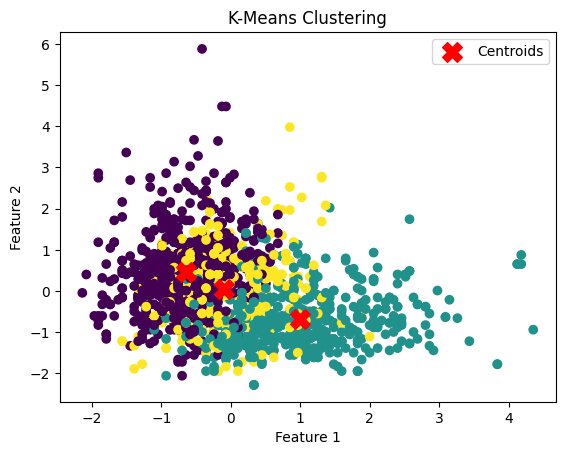

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np  # Import numpy to use np.unique

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/winequality-red.csv", sep=';')

# Feature columns: all columns except 'quality' (the target column)
X = df.drop('quality', axis=1).values  # Features

# Feature Scaling: It's a good practice to scale features for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Apply K-Means clustering with k=3 (for example, we choose 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):\n", kmeans.cluster_centers_)

# Print the number of samples in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

# Visualize the clustering (optional, for 2D visualization)
# Here we just pick the first two features to create a 2D scatter plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**KMeans Manually**

Convergence reached after 17 iterations.
Cluster Centers (Centroids):
 [[-0.64907467  0.45541847 -0.75961978 -0.23040106 -0.18945376 -0.22638711
  -0.35192467 -0.45067488  0.61325445 -0.28871833  0.0667032 ]
 [-0.09432101  0.04107636  0.09604791  0.40203359 -0.00492821  1.07422789
   1.32239093  0.28077343 -0.17394613 -0.18657285 -0.50672128]
 [ 1.00398862 -0.68568878  1.02077194  0.03104975  0.27616274 -0.47686049
  -0.48168723  0.43844069 -0.75207155  0.55462042  0.28259117]]
Cluster Sizes: {np.int64(0): np.int64(722), np.int64(1): np.int64(375), np.int64(2): np.int64(502)}


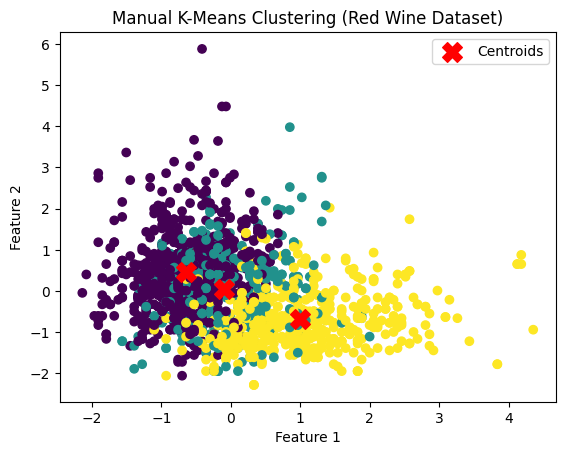

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Red Wine dataset
df = pd.read_csv(r"/content/drive/MyDrive/winequality-red.csv", sep=';')

# Feature columns: All columns except 'quality' (target)
X = df.drop('quality', axis=1).values  # Features

# Feature Scaling: Scaling features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

# Manual K-Means clustering implementation
def initialize_centroids(X, k):
    """Randomly initialize k centroids"""
    np.random.seed(42)  # Set seed for reproducibility
    random_indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[random_indices]

def euclidean_distance(X, centroids):
    """Compute Euclidean distance between each point in X and each centroid"""
    # Formula: distance(x, c) = sqrt(sum((x_i - c_i)^2))
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return distances

def assign_clusters(X, centroids):
    """Assign each point to the nearest centroid"""
    distances = euclidean_distance(X, centroids)  # Calculate distances from points to centroids
    return np.argmin(distances, axis=1)  # Assign labels based on minimum distance

def update_centroids(X, labels, k):
    """Update centroids to be the mean of points in each cluster"""
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        # Formula for updating centroid: c_i = (1/|S_i|) * sum(x_j)
        centroids[i] = X[labels == i].mean(axis=0)
    return centroids

def kmeans(X, k, max_iters=100, tol=1e-4):
    """Main K-Means algorithm"""
    centroids = initialize_centroids(X, k)  # Initialize centroids randomly
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)  # Assign points to nearest centroid
        new_centroids = update_centroids(X, labels, k)  # Update centroids

        # Check for convergence (if centroids don't change significantly)
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Convergence reached after {i+1} iterations.")
            break
        centroids = new_centroids  # Update centroids for the next iteration

    return centroids, labels

# Run K-Means manually
k = 3  # Number of clusters
centroids, labels = kmeans(X_scaled, k)

# Print the cluster centers (centroids)
print("Cluster Centers (Centroids):\n", centroids)

# Print the number of samples in each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster Sizes:", dict(zip(unique, counts)))

# Visualize the clustering (for 2D visualization, using only the first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("Manual K-Means Clustering (Red Wine Dataset)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**Experiment 9 - PCA from Scratch**


---

A dimensionality reduction technique that transforms data into a new set of uncorrelated features (principal components), ordered by how much variance they capture from the original dataset.

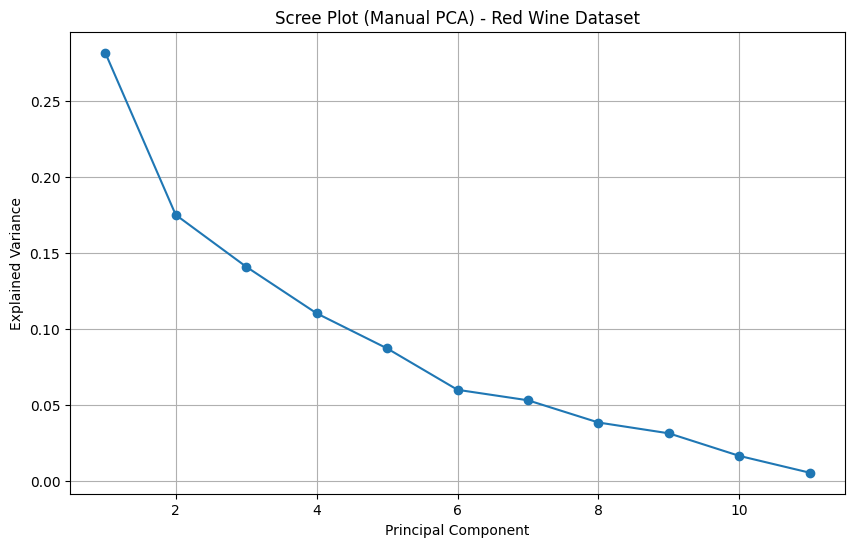

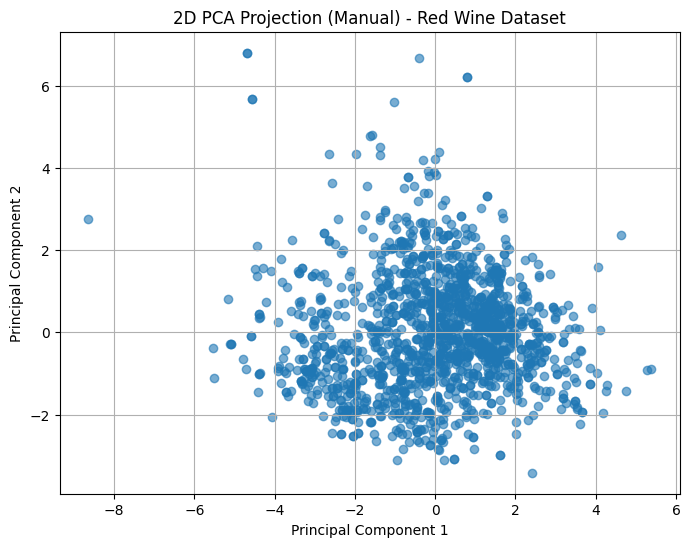

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Red Wine dataset
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv", sep=';')

# Extract features (drop 'quality')
X = df.drop(columns=["quality"]).values

# Standardize the dataset manually
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Covariance matrix
cov_matrix = np.cov(X_standardized, rowvar=False)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors (descending order)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

# Compute explained variance ratio
explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)

# Select top 2 eigenvectors for 2D transformation
top_2_eigenvectors = eigenvectors_sorted[:, :2]
X_transformed = np.dot(X_standardized, top_2_eigenvectors)

# Scree Plot (All Components)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot (Manual PCA) - Red Wine Dataset')
plt.grid(True)
plt.show()

# 2D PCA Projection
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection (Manual) - Red Wine Dataset')
plt.grid(True)
plt.show()


**Experiment 9 - PCA using ReadyMade Libraries**

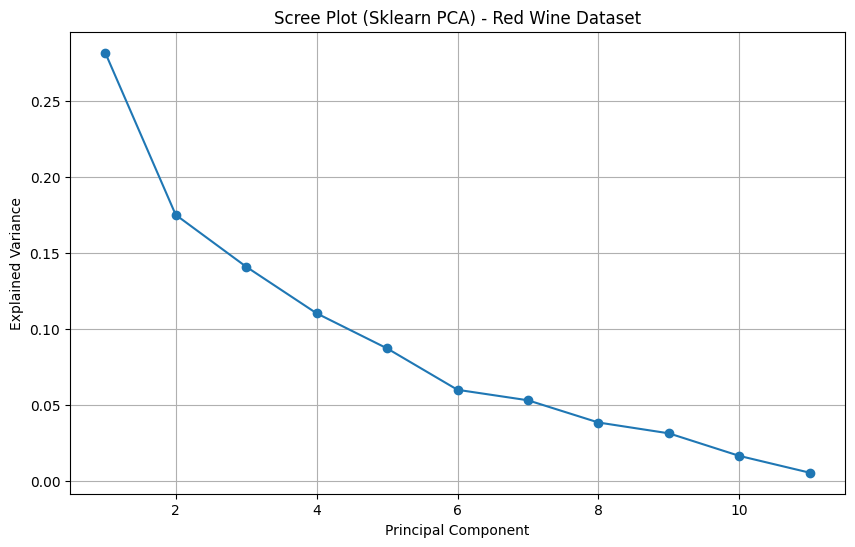

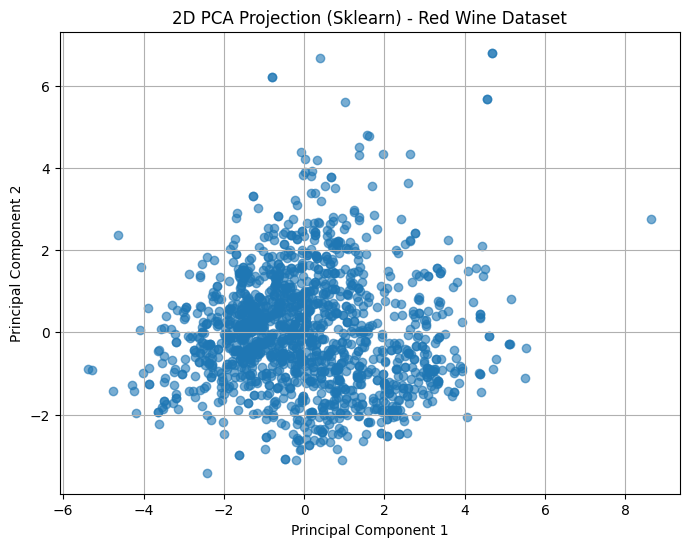

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv", sep=';')

# Extract and standardize features
X = StandardScaler().fit_transform(df.drop(columns=["quality"]))

# PCA with all components
pca = PCA()
X_pca_full = pca.fit_transform(X)

# Scree Plot (All Components)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot (Sklearn PCA) - Red Wine Dataset')
plt.grid(True)
plt.show()

# PCA projection to 2D
pca_2d = PCA(n_components=2)
X_transformed = pca_2d.fit_transform(X)

# 2D PCA Projection
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection (Sklearn) - Red Wine Dataset')
plt.grid(True)
plt.show()


**Experiment 6 and 10 - Random Forest**


---

An ensemble method that builds multiple decision trees on different subsets of data and averages their predictions to improve accuracy and reduce overfitting.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv",sep=';')

# Define features (X) and target (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.659375

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320


Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 98 31  1  0]
 [ 0  1 31 91  8  1]
 [ 0  0  0 19 22  1]
 [ 0  0  0  1  4  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Experiment 11 - Boosting**


---

A sequential ensemble technique that builds models iteratively, where each new model focuses on correcting the errors made by previous ones, improving performance over time.

In [22]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv",sep=';')

# Define features (X) and target (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# Shift labels to start from 0
y = y - 3  # Since minimum quality is 3

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.696875

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.75      0.80      0.78       130
           3       0.68      0.73      0.70       132
           4       0.64      0.55      0.59        42
           5       0.00      0.00      0.00         5

    accuracy                           0.70       320
   macro avg       0.34      0.35      0.34       320
weighted avg       0.67      0.70      0.68       320


Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   1 104  24   1   0]
 [  0   1  25  96   9   1]
 [  0   0   1  17  23   1]
 [  0   0   0   2   3   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Experiment 12 - Performance Matrix / Evaluation**

Accuracy:  0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.10      0.17        10
           2       0.70      0.77      0.74       130
           3       0.63      0.65      0.64       132
           4       0.60      0.50      0.55        42
           5       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.41      0.34      0.35       320
weighted avg       0.64      0.65      0.64       320



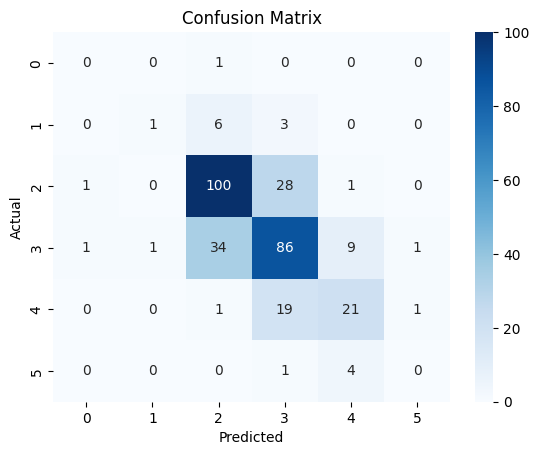

<ipython-input-24-2a682609e0db>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quality_counts.index, y=quality_counts.values, palette="viridis")


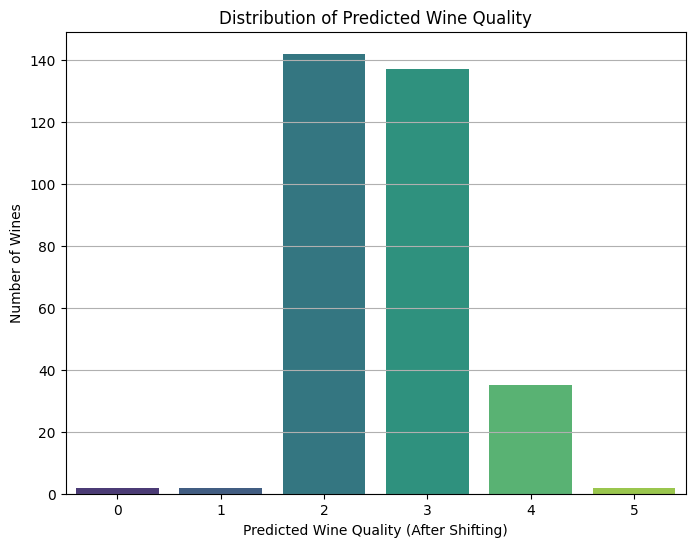

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv",sep=';')

# Define features and target
X = df.drop("quality", axis=1)
y = df["quality"]

# Shift the target labels so they start from 0
y = y - 3  # wine quality labels become 0, 1, 2, 3, 4, 5

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Evaluation
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# =========================
# 📊 Bar Plot: Predicted Wine Quality Distribution
# =========================

# Create a Pandas Series from predictions
predicted_quality = pd.Series(y_pred)

# Count the number of samples predicted for each quality
quality_counts = predicted_quality.value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette="viridis")
plt.xlabel('Predicted Wine Quality (After Shifting)')
plt.ylabel('Number of Wines')
plt.title('Distribution of Predicted Wine Quality')
plt.grid(axis='y')
plt.show()
